In [30]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from sklearn.metrics import accuracy_score
np.set_printoptions(precision=5)#show 5 number after decimal point 

In [31]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [32]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [33]:
print("X_train.shape :" ,X_train.shape)
print("y_train.shape :", y_train.shape)
print ("X_test.shape :" , X_test.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (60000, 28, 28)
y_train.shape : (60000,)
X_test.shape : (10000, 28, 28)
y_test.shape : (10000,)


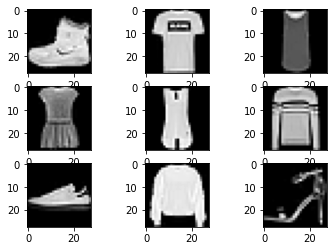

In [34]:
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
plt.show()

In [35]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [36]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000, 28*28)

In [37]:
print("X_train.shape :" ,X_train.shape)
print("y_train.shape :", y_train.shape)
print ("X_test.shape :" , X_test.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (60000, 784)
y_train.shape : (60000,)
X_test.shape : (10000, 784)
y_test.shape : (10000,)


In [38]:
#Check that we have balnced data
unique, counts = np.unique(y_train, return_counts=True)
print("y_train :", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("y_test :", dict(zip(unique, counts)))

y_train : {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}
y_test : {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


##  Models:

We will try several models and in the end we will decide which is the best model.<br>
We will try the following models:
* Random Forest
* KNN

In [39]:
from sklearn.model_selection import train_test_split

#split the train
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=42)

In [40]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print("The DummyClassifier score is:" ,accuracy_score(y_pred,y_test))

The DummyClassifier score is: 0.1


In [41]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

#### KNN :

In [58]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier().fit(X_train, y_train)
y_pred = KNN.predict(X_val)
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy:", round(accuracy,3))

Accuracy: 0.853


In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

scores = []
for i in range(400,783,50):
    X_new = SelectKBest(chi2, k=i).fit_transform(X_train, y_train)
    X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_new,y_train, test_size=0.1, random_state=42)
    KNN = KNeighborsClassifier().fit(X_train_new, y_train_new)
    y_pred = KNN.predict(X_val_new)
    accuracy = round(metrics.accuracy_score(y_val_new, y_pred),3)
    print("number of features : ", i, ", Accuracy:", accuracy)
    scores.append(accuracy)

number of features :  400 , Accuracy: 0.855
number of features :  450 , Accuracy: 0.856
number of features :  500 , Accuracy: 0.859
number of features :  550 , Accuracy: 0.859
number of features :  600 , Accuracy: 0.862
number of features :  650 , Accuracy: 0.861
number of features :  700 , Accuracy: 0.856
number of features :  750 , Accuracy: 0.856


In [ ]:
### best accuracy with 600 features.

In [61]:
X_train = SelectKBest(chi2, k=i).fit_transform(X_train, y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=42)

#### RandomForest :

In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = RF.predict(X_val)
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy:", round(accuracy,3))

#### XGBoost : 

In [42]:
%%time
from xgboost import XGBClassifier

XGB = XGBClassifier(objective="multi:softprob",num_class=10).fit(X_train, y_train,eval_metric='auc')
y_pred = XGB.predict(X_val)      
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy:", round(accuracy,3))

Accuracy: 0.904
CPU times: total: 54min 54s
Wall time: 8min 14s


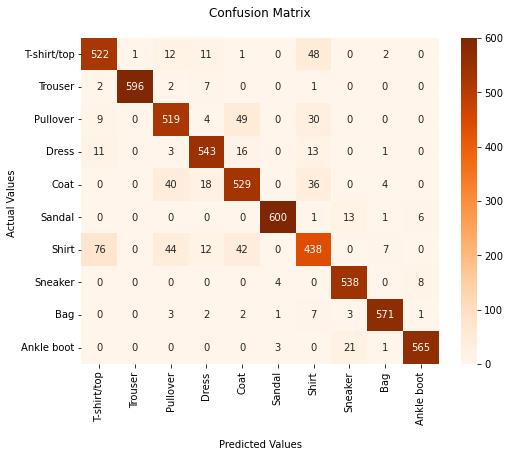

In [43]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Oranges')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],rotation=90)
ax.yaxis.set_ticklabels(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],rotation=0)

plt.show()

In [44]:

for name, score in zip(X_train, XGB.feature_importances_):
    print(name, score)

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.     

[0.      0.      0.      0.      0.      0.      0.00392 0.      0.
 0.      0.07451 0.48235 0.30588 0.50588 0.47451 0.4     0.38431 0.
 0.      0.      0.      0.00392 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.17255 0.51765 0.66667 0.62353 0.59216 0.70196 0.73725 0.05098 0.87843
 0.35686 0.1451  0.04706 0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.07843
 0.39608 0.48235 0.55686 0.51765 0.49412 0.49412 0.56078 0.45098 0.01569
 0.56863 0.37647 0.12941 0.16863 0.28627 0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.58431 0.2902  0.33725 0.54118 0.51765 0.52157 0.5098  0.56471 0.42353
 0.01569 0.67843 0.40392 0.06275 0.11765 0.26275 0.26275 0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.5451  0.34902 0.31373 0.56078 0.52157 0.52157 0.51373 0.56471
 0.42745 0.02353 0.6313

 0.     ] 0.00033625902
[0.      0.      0.      0.      0.      0.      0.      0.01176 0.00784
 0.      0.      0.03529 0.91765 0.83529 0.79608 0.76471 0.94118 0.22745
 0.      0.      0.00392 0.01569 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.00784 0.
 0.      0.      0.04706 0.93725 0.99608 0.97647 1.      0.98431 0.99216
 1.      0.07451 0.      0.      0.      0.00784 0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.43922 0.87843 0.97647 0.96863 0.92549 0.98039 0.95686 0.96863
 0.93333 0.95294 0.95686 0.87059 0.51765 0.06275 0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.00392 0.
 0.24314 0.93333 1.      0.98431 0.9451  0.93333 0.96471 0.96863 0.96078
 0.97255 0.95294 0.93333 0.94118 0.99216 1.      0.96078 0.43529 0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.83137 0.98039 0.92157 0.93333 0.94902 0.94902 0.98039 0.

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.00784 0.      0.      0.41569 0.47451 0.17255 0.      0.01569
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.00784 0.      0.6     0.16863 0.      0.74902 0.
 0.      0.00392 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.00784 0.      0.07059 0.73333 0.      0.      0.30588
 0.50588 0.      0.02353 0.00392 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.02353 0.      0.33333 0.37255 0.      0.
 0.      0.48235 0.      0.      0.      0.      0.      0.00392 0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.01569 0.      0.54118 0.15294 0.
 0.01569 0.      0.43137 0.18431 0.   

 0.     ] 0.0017982369
[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.17647
 0.71765 0.52941 0.      0.      0.      0.      0.      0.      0.
 0.03922 0.65098 0.6902  0.13725 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.01569 0.      0.06275 0.42745
 0.73725 0.91765 0.73725 0.66667 0.33725 0.54118 0.2     0.      0.66667
 0.97255 0.65098 0.92157 0.92941 0.91373 0.6902  0.      0.      0.
 0.      0.00392 0.      0.      0.      0.00392 0.      0.      0.78824
 0.92157 0.89412 0.92157 0.92157 0.89412 0.92157 0.85882 0.74118 0.61961
 0.78431 0.52549 0.72157 0.94902 0.65882 0.26667 0.97255 0.43529 0.
 0.03529 0.00392 0.      0.      0.      0.      0.      0.      0.12157
 0.75294 0.63922 0.66275 0.9451  0.41961 0.40392 0.89412 0.8549

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.19216 0.29412 0.30588 0.10196 0.
 0.      0.00392 0.00392 0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.07843 0.58039 0.29412 0.12157 0.08627 0.48235
 0.51373 0.      0.      0.00392 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.26667 0.12549 0.      0.      0.
 0.      0.28627 0.09804 0.      0.00392 0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.21176 0.      0.00392 0.01176
 0.      0.      0.05098 0.08235 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.27843 0.      0.00392
 0.      0.      0.      0.13725 

 0.     ] 0.0010362988
[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.37647 0.74902 0.47059 0.38431 0.38431 0.36078 0.44314 0.78824
 0.27059 0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.08235 0.43922
 0.74118 0.90588 0.83137 0.8     1.      0.86275 0.83529 1.      0.95294
 0.84706 0.93333 0.86667 0.62745 0.23529 0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.38039 0.84706
 0.84706 0.82745 0.8     0.76078 0.75686 0.71765 0.76078 0.76471 0.74902
 0.71765 0.77255 0.76471 0.80392 0.8549  0.86275 0.67451 0.00392 0.
 0.      0.      0.      0.      0.      0.      0.      0.00784 0.8
 0.80784 0.76471 0.76471 0.76078 0.78431 0.78039 0.79608 0.78824 0.78039
 0.75686 0.80392 0.79216 0.78824 0.78039 0.76471 0.76078 0.87451 0.58824
 0.      0.      0.      0.      0.      0.      0.      0.      0.41176
 0.87059 0.77647 0.79608 0.78039 0.76471 0.75686 0.77647 0.80392 0.75686
 0

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.19608 0.19216 0.14118 0.15294 0.32157 0.
 0.      0.      0.00392 0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.27843 0.80392 0.69412 0.6902  0.57647 0.97647
 0.19608 0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.06667 0.19216 0.41961 0.64314 0.73725 0.70588 0.6902  0.74118
 0.82353 0.36078 0.31765 0.22353 0.04706 0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.13725 0.32549 0.38431 0.37255 0.29412 0.61961 0.34902 0.78431 0.8549
 0.91765 0.74118 0.2549  0.3451  0.36078 0.40392 0.37647 0.11765 0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.16471 0.48235 0.34902 0.29804 0.31765 0.22745 0.40392 0.50196 0.80784
 0.96078 0.98431 0.57255 0.33

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.53333 0.54118 0.48235 0.55294 0.38039 0.4549  0.34118 0.21176
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.03529 1.      0.87059 0.73333 0.96471 0.52549 0.7451  0.63529
 0.39216 0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.2902  0.86275 0.54118 0.51373 0.80392 0.44314 0.58431
 0.64314 0.51373 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.30588 0.76471 0.55294 0.58431 0.7451  0.47451
 0.55294 0.56471 0.52157 0.0549  0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.47059 0.68235 0.5451  0.58039 0.6902
 0.50196 0.58431 0.54118

[0.      0.      0.      0.      0.      0.      0.53333 0.54118 0.22353
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.22745 0.52157 0.43529 0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.78824 0.69412
 0.74118 0.83922 0.76863 0.56863 0.56078 0.5098  0.42745 0.48627 0.51765
 0.65098 0.79608 0.88627 0.70196 0.70588 0.72549 0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.12157 0.78824
 0.58824 0.61569 0.69412 0.69412 0.70588 0.7098  0.75294 0.72941 0.7098
 0.73333 0.71373 0.67451 0.65882 0.63529 0.60392 0.78039 0.09412 0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.35294
 0.74902 0.52549 0.64314 0.73725 0.63529 0.70196 0.56863 0.69804 0.74118
 0.69804 0.66667 0.61176 0.60392 0.63137 0.74118 0.59608 0.7451  0.29804
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.49412 0.6     0.51765 0.63137 0.7098  0.66275 0.65882 0.59216 0.69412
 0.8

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.70588 0.69412 0.52157 0.52157 0.2902  0.43137 0.31373 0.43137
 0.20392 0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.11765 0.80392 0.59608 0.59608 0.62745 0.38039 0.5098  0.30196
 0.43137 0.3451  0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.4549  0.76863 0.52157 0.52941 0.62745 0.31373 0.54118
 0.24706 0.32549 0.44314 0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.61569 0.66275 0.54118 0.49804 0.54118 0.28235
 0.48627 0.54118 0.42353 0.4549  0.14118 0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.62745 0.72549 0.57255 0.5098  0.52157
 0.49804 0.4     0.5843

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.00784 0.      0.      0.58039 0.58039
 0.4     0.01961 0.14902 0.40784 0.54118 0.66667 0.18039 0.10588 0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.01569 0.      0.01961 0.84706
 0.89804 0.88627 1.      1.      1.      0.81961 0.95294 1.      0.99216
 0.6549  0.03529 0.      0.00784 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.01569 0.      0.01961
 0.78431 0.80784 0.87843 0.8

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.0025700543
[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.00392 0.      0.05098 0.26667 0.02745 0.      0.00784 0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.34118 0.04706 0.36078 0.02353 0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.00392 0.      0.18039 0.36471 0.      0.4     0.23529
 0.      0.00784 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.00392 0.00784 0.      0.      0.61569 0.88627 0.63137 0.83529
 0.71373 0.      0.      0.01176 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.00392 0.      0.      0.51373 0.72157 0.71765 0.90196
 0.81961 0.68235 0.

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.02353 0.      0.      0.22353 0.0902  0.      0.      0.01961
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.01569 0.      0.      0.78824 0.56078 0.64706 0.56863 0.
 0.      0.01961 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.01569 0.      0.05882 0.77647 0.50196 0.      0.      0.52549
 0.76078 0.      0.      0.02353 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.01961 0.      0.05882 0.88235 0.37255 0.      0.      0.
 0.      0.41176 0.82745 0.      0.      0.01176 0.      0.      0.
 0.      0.00784 0.      0.      0.      0.      0.      0.      0.
 0.      0.00392 0.      0.07843 0.54118 0.38039 0.      0.01176 0.
 0.      0.01176 0.      0.60784 0.831

[0.      0.      0.      0.      0.      0.      0.      0.00392 0.00392
 0.00392 0.      0.      0.44706 0.31765 0.41569 0.29412 0.      0.
 0.      0.00392 0.      0.00784 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.00392 0.
 0.01961 0.00392 0.      0.37647 0.78824 0.65882 0.76078 0.86667 0.
 0.      0.      0.01569 0.00392 0.      0.00392 0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.14902 0.64706 0.56471 0.54902 0.57647 0.59216
 0.36471 0.      0.      0.      0.00392 0.00392 0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.28627 0.63137 0.70196 0.6     0.55294 0.52157 0.53333
 0.56078 0.64706 0.69412 0.50588 0.06667 0.      0.00784 0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.01569 0.      0.29412 0.60392 0.51765 0.46275 0.46667 0.47451 0.48627
 0.48627 0.47451 0.46275 0.5

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.08235 0.06275 0.      0.      0.      0.      0.      0.07059
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.30588 0.82353 0.83529 0.90196 0.99216 0.40784 0.48627 1.      0.87451
 0.81176 0.89804 0.09412 0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.86667 0.86667 0.77255 0.83922 0.98039 0.90588 0.90196 1.
 0.85098 0.76078 0.92941 0.75686 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.30196 0.92941 0.8     0.81176 0.74902 0.76078 0.83137 0.86275
 0.76471 0.74902 0.79608 0.81176 0.91765 0.15294 0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.4902  0.93333 0.81176 0.79216 0.80784 0.80392 0.76471
 0.79216 0.77255 0.8     0.7

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.     

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.00392 0.00392 0.00784 0.      0.08627 0.19216 0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.00784 0.
 0.      0.00392 0.02745 0.      0.      0.      0.03529 0.      0.
 0.      0.01961 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.00784 0.01176 0.
 0.00392 0.      0.      0.      0.      0.      0.11373 0.14118 0.03137
 0.      0.      0.      0.      0.      0.00392 0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.00392 0.
 0.      0.00392 0.      0.      0.41569 0.83137 1.      0.75686 0.5451
 0.97255 0.87451 0.6549  0.25098 0.      0.      0.00392 0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.00784 0.00392 0.01176 0.      0.10588 0.91765 0.73333 0.27843 0.04314
 0.0549  0.07843 0.62353 0.8549  1

Text(0.5, 0, 'Random Forest Feature Importance')

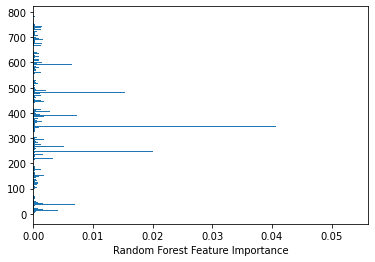

In [53]:

sorted_idx = XGB.feature_importances_.argsort()
plt.barh(sorted_idx, XGB.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


In [12]:
#Searching for better performance out of the models with RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#XGBClassifier

parameters = {
        'learning_rate': [ 0.1,0.3,0.03],
        'max_depth': [4,5,6],
        'min_child_weight': [1, 2],
        'subsample': [0.5,0.6,1],
        'colsample_bytree': [0.3,0.5, 0.7],
        'n_estimators' : [100,150,170,200]
         }

random_XGB = RandomizedSearchCV(XGBClassifier(),parameters, verbose=True, n_jobs=-1, 
                          cv=3,random_state=3, n_iter = 2, return_train_score=True, num_class=2)
random_XGB.fit(X_train,y_train, eval_metric='auc')
y_pred_XGB_random = random_XGB.predict(X_test)
print ("Accuracy Score = ",metrics.accuracy_score(y_test,y_pred_XGB_random))
print (random_XGB.best_params_)

In [ ]:
#KNN
parameters = {'n_neighbors':[int(x) for x in range(10, 100)],
              'weights':['uniform','distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev'],
              'p':[1,2],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
random_KNN = RandomizedSearchCV(KNeighborsClassifier(),parameters, verbose=True, n_jobs=15, 
                          cv=5, random_state=42,n_iter=100)
random_KNN.fit(X_train,y_train)
y_pred_KNN = random_KNN.predict(X_test)
print ("Accuracy Score =",(round(metrics.accuracy_score(y_test, y_pred_KNN),3)))
print (random_KNN.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
